In [9]:
!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [10]:
df = pd.read_csv("/Users/jeebanbashyal/Developer/dataanalysis/netflix_titles.csv")
df_original = df.copy()

df.head()
print(df.info())
print(df.describe())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


/var/folders/mr/9yhkqcld7hz6zms9tkxj3r040000gn/T/ipykernel_37997/2535108855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="viridis")


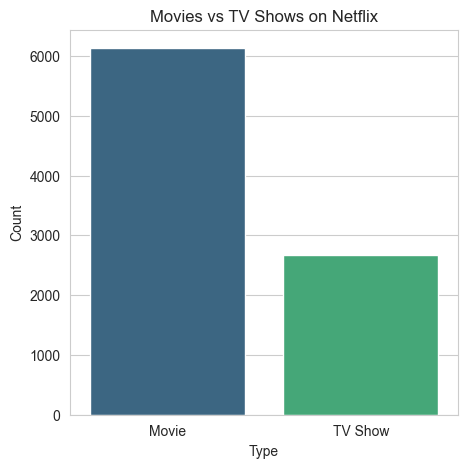

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x="type", palette="viridis")
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

Netflix has more Movies than TV Shows in the dataset.


In [17]:
df_genres = df.assign(genre=df['listed_in'].str.split(", ")).explode("genre")

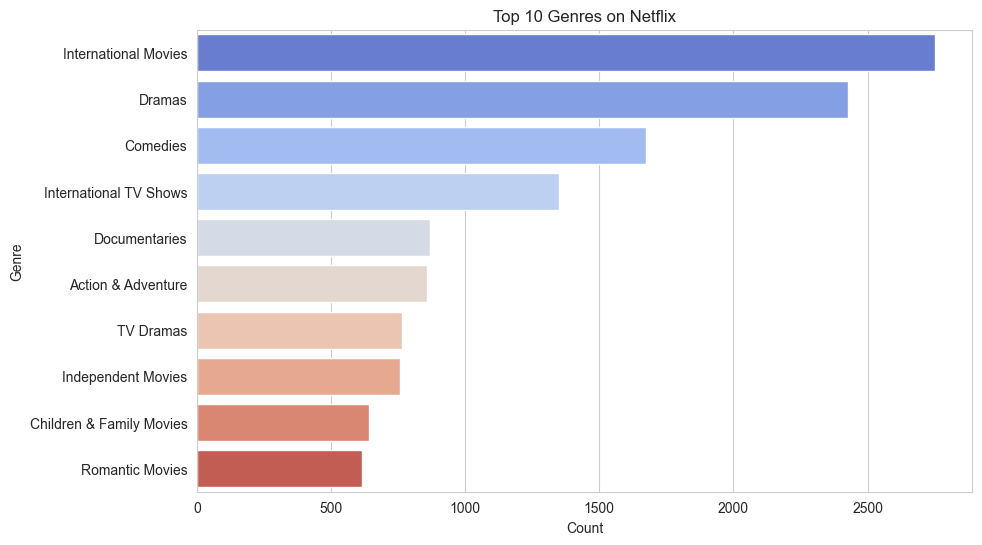

In [19]:
top_genres = df_genres['genre'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, 
y=top_genres.index,
hue=top_genres.index,
palette="coolwarm", 
legend=False)

plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

### Top 10 Genres
International Movies, Drama, and Comedies appear most frequently on Netflix.


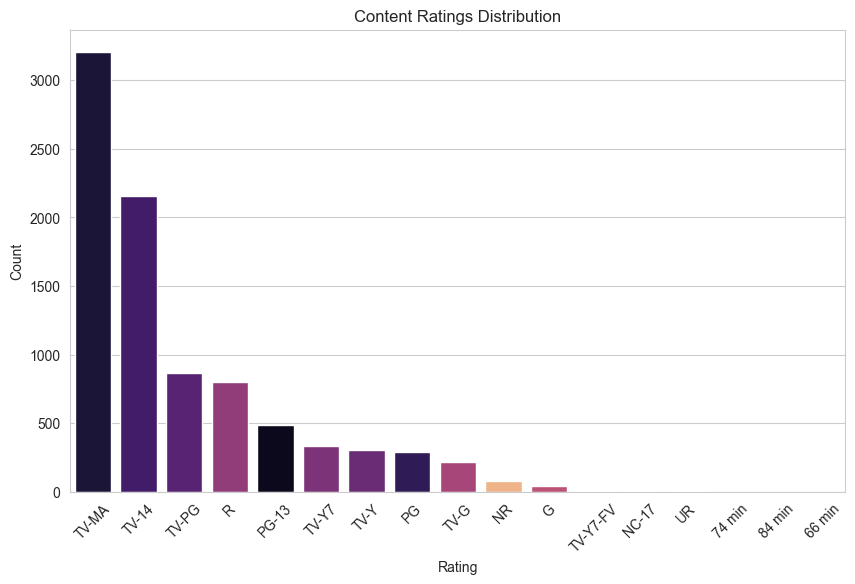

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x="rating",
    hue="rating",
    order=df['rating'].value_counts().index,
    palette="magma",
    legend=False)
plt.title("Content Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.savefig("/Users/jeebanbashyal/Developer/dataanalysis/movies_vs_tvshows.png", dpi=300, bbox_inches="tight")
plt.show()

### Ratings Distribution
TV-MA is the most common rating on Netflix, indicating a lot of mature content.